## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/airbnb_hw.csv')

x = df.loc[:,['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']] #note "Of" not "of" for reviews

x.head()

,Price,Beds,Number Of Reviews,Review Scores Rating
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0


In [4]:
x.describe()

,Beds,Number Of Reviews,Review Scores Rating
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [5]:
#clean price
print(x['Price'].value_counts()) #notice 2,695 and 2,520 have a ',', need to clean that
print(type(x['Price'].values))

#removing ','
x['Price'] = x['Price'].str.replace(',','')

#turning to price to an int
x['Price'] = pd.to_numeric(x['Price'], errors='coerce')

print('post clean: ')
print(x['Price'].value_counts())

x.describe() #price count preserved and , removed

Price
150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: count, Length: 511, dtype: int64
<class 'numpy.ndarray'>
post clean: 
Price
150     1481
100     1207
200     1059
125      889
75       873
        ... 
840        1
306        1
2695       1
2520       1
291        1
Name: count, Length: 511, dtype: int64


,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [6]:
#cleaning beds
x['Beds'].value_counts() #1 bed is most common, would be good to impute all missing values with just 1.0

#we know Beds is missing 85 values from the describe above
x['Beds'] = x['Beds'].fillna(1)

x.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [7]:
#clean number of reviews
#from describe above we know theres no missing values

#checking type
x['Number Of Reviews'].describe() #its a float so looks fine

count    30478.000000
mean        12.018735
std         21.980703
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max        257.000000
Name: Number Of Reviews, dtype: float64

In [8]:
#clean review scores rating
#from describe we know there is 8323 total missing

#need to find which are actually missing ie the ones where number of reviews = 0
pd.crosstab(df['Review Scores Rating'].isnull(), df['Number Of Reviews']>0)

Number Of Reviews,False,True
Review Scores Rating,,
False,0,22155
True,7814,509


In [9]:
#originally tried to replace na values with number of reviews average but it messes with the data. Following solutions and dropping the false missing data
x = x.dropna()

x.describe() #dropped 7814 observations and all variables have been cleaned

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).


In [10]:
#maxmin function from knn.ipynb notes
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

#dropping Price as it is the target variable
X = x.drop('Price', axis = 1)
X = X.apply(maxmin)

#all nans should already be removed due to cleaning

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.


In [11]:
from sklearn.cluster import KMeans # Import kmc

#create kmc model(used same parameters as kmc.ipynb)
model = KMeans(n_clusters=6, max_iter=300, n_init = 10 ,  random_state=0) 
model = model.fit(X)


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.


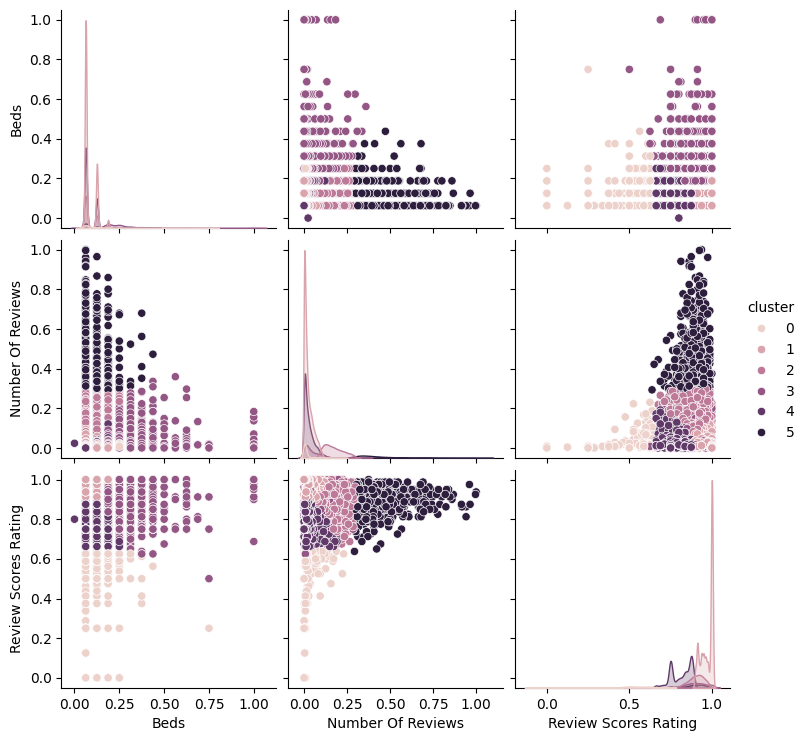

In [12]:
import seaborn as sns

X['cluster'] = model.labels_ #model.labels_ contains the cluster labels assigned to each data point
sns.pairplot(data = X, hue='cluster')


5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?


In [13]:
#need to add clusters to old df with Price
x['cluster'] = model.labels_
x.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                             
           count        mean         std   min    25%    50%     75%      max
cluster                                                                      
0          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
1        10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00  10000.0
2         3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   1000.0
3         1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   4500.0
4         5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   5000.0
5          792.0  133.224747   83.088608  27.0   80.0  110.0  167.50    875.0

*The clusters with the highest rental prices are cluster 3 and cluster 1. CLuster 3 is the highest price with almost double the price of cluster 1, which had the second highest rental price.*

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

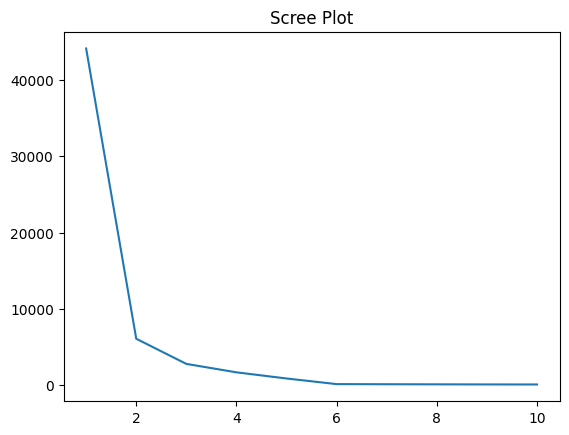

In [14]:
#making scree plot, adapted from kmc.ipynb
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar) #training error
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10 ,  random_state=0) 
    model = model.fit(X)
    SSE[k] = model.inertia_ #sum of squared error for the specific k value

#screeplot
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')    

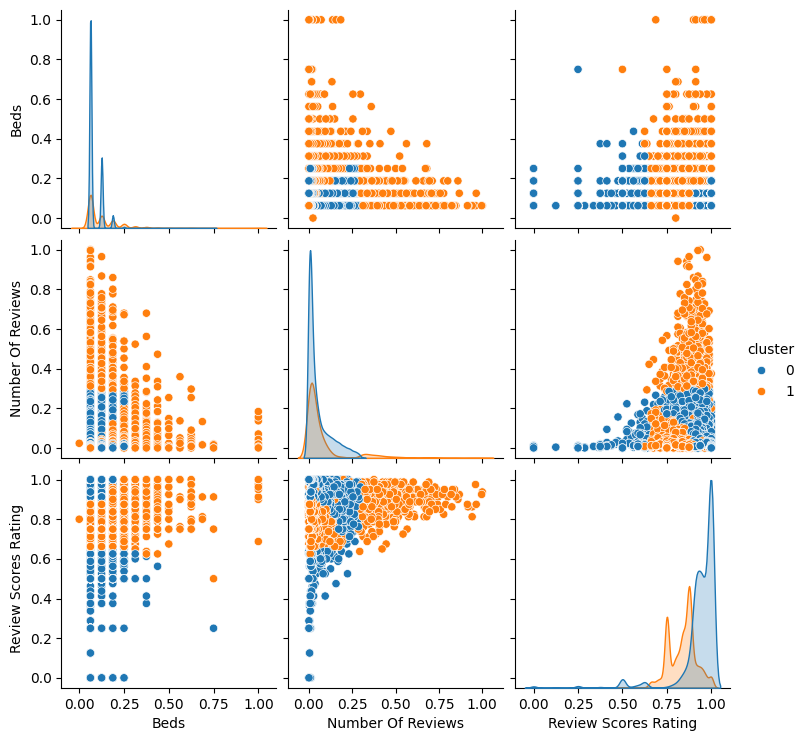

In [15]:
#picking k=2
model = KMeans(n_clusters=2, max_iter=300, n_init = 10 ,  random_state=0) 
model = model.fit(X)

X['cluster'] = model.labels_ #model.labels_ contains the cluster labels assigned to each data point
sns.pairplot(data = X, hue='cluster')

In [16]:
x['cluster'] = model.labels_
x.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        14183.0  149.153564  140.316751  10.0  85.0  125.0  185.0  10000.0
1         7972.0  164.811214  162.423210  20.0  81.0  129.0  199.0   5000.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

In [17]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


<Axes: xlabel='x1', ylabel='x2'>

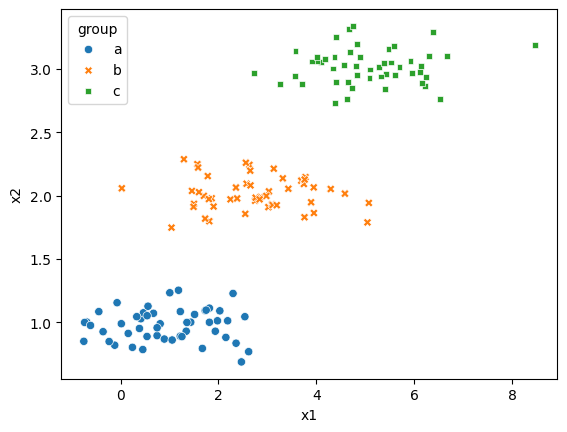

In [18]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

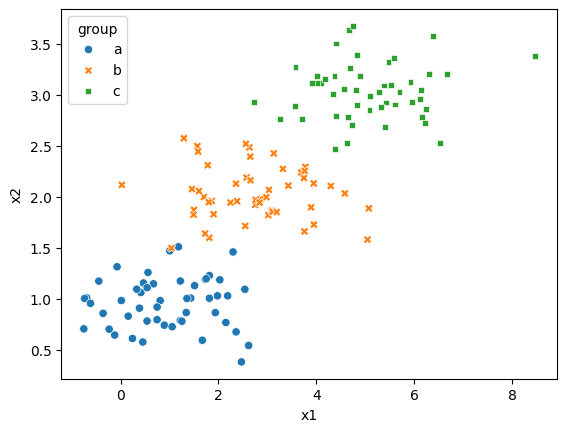

In [19]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

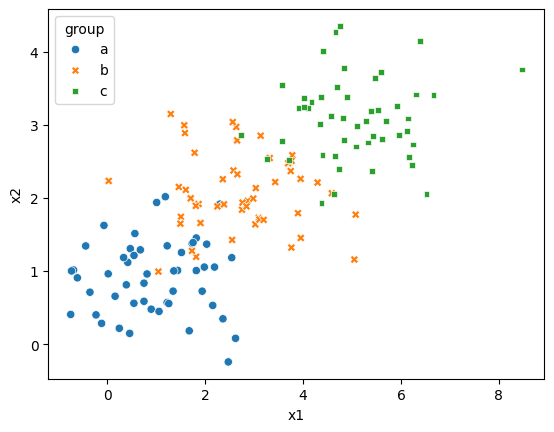

In [20]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

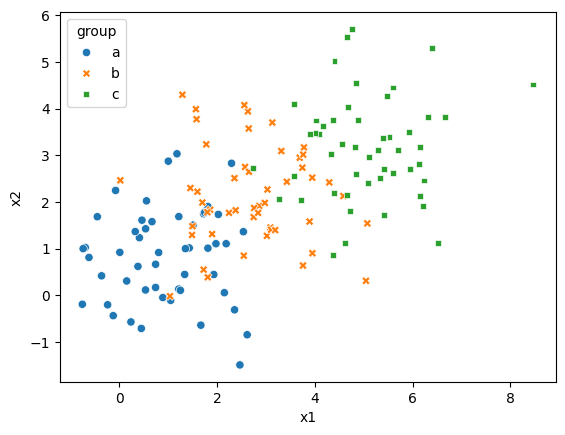

In [21]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

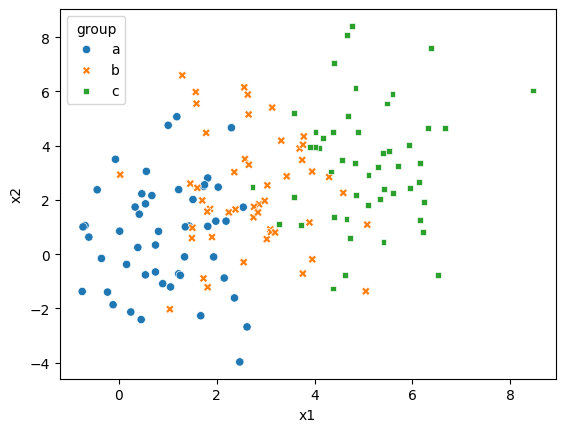

In [22]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

*As the `noise` goes up from 0.125 to 2.0, the visual distinctness of the clusters becomes less distinct.*

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.


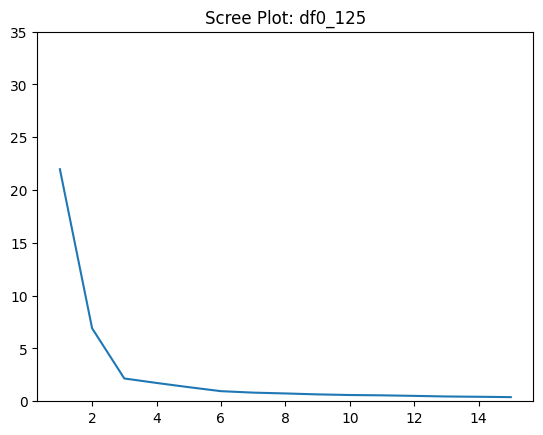

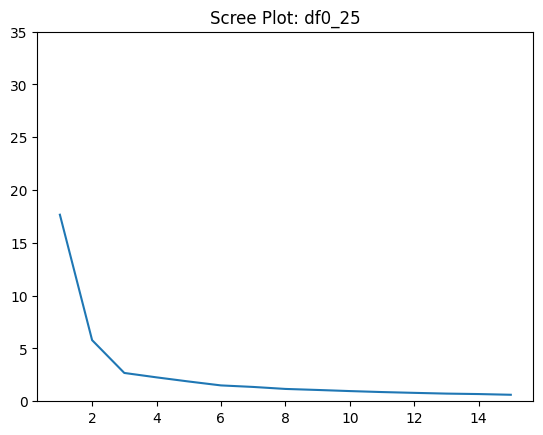

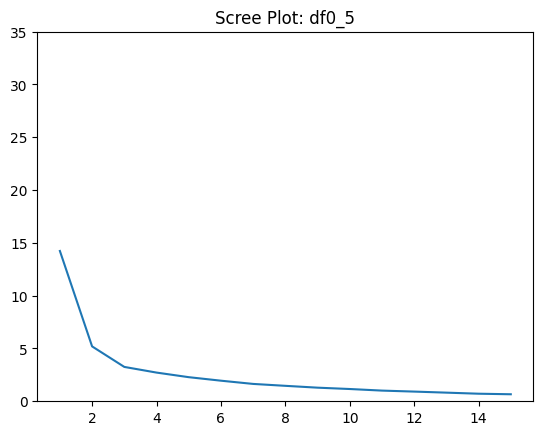

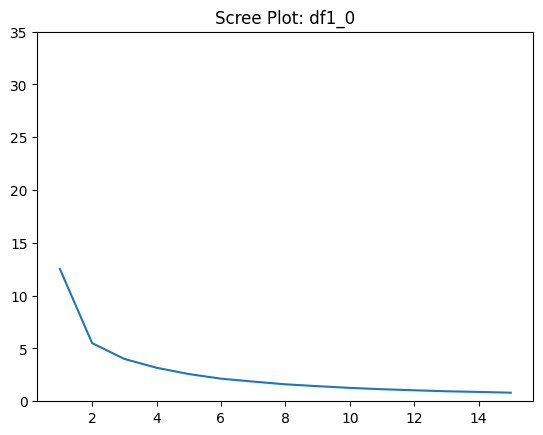

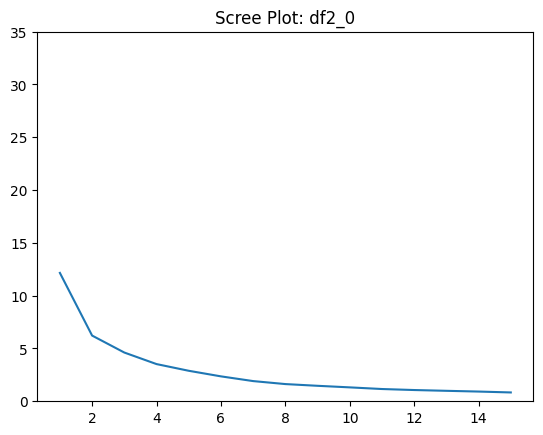

In [35]:
import matplotlib.pyplot as plt

#thinking for loop on all the datasets
#maxmin function from knn.ipynb notes
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

#dictionary of all the data frames to put in the loop
#was originally just a list but i was getting annoyed trying to reference the df name
dfList = {'df0_125': df0_125,
    'df0_25': df0_25,
    'df0_5': df0_5,
    'df1_0': df1_0,
    'df2_0': df2_0}

#nested for loop
for names, df in dfList.items():
    x = df.loc[: , ['x1', 'x2']] #variables from given code above
    x = x.apply(maxmin)
    
    #scree plots
    k_bar = 15
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range (k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(x)
        SSE[k] = model.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title(f'Scree Plot: {names}')
    axes.set_ylim(0, 35)



*As the noise increases in each scree plot, the ability to distinguish the "elbow" further descreases. The more noise the dataframe has, the elbow becomes less sharp and the ability to determine an optimal k value gets harder.*

4. Explain the intuition of the elbow, using this numerical simulation as an example

*Elbows are used to decide an optimal k value, as it is the spot where the reduction in sum squared error from going to k-1 to k drops significantly (compared from k to k + 1). For the dataframes with more noise (ie. df2_0 and df1_0) it would make sense there is no real elbow as when more noise is added it makes distint and discrete clusters harder to identify.*

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?